In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)

# Loading the Dataset

In [3]:
data = pd.read_csv('kc_house_data.csv')
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.drop('id', axis=1, inplace=True)
print(data.shape)

data.head()

(21613, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data['price'].dtype

dtype('float64')

# Target Variable

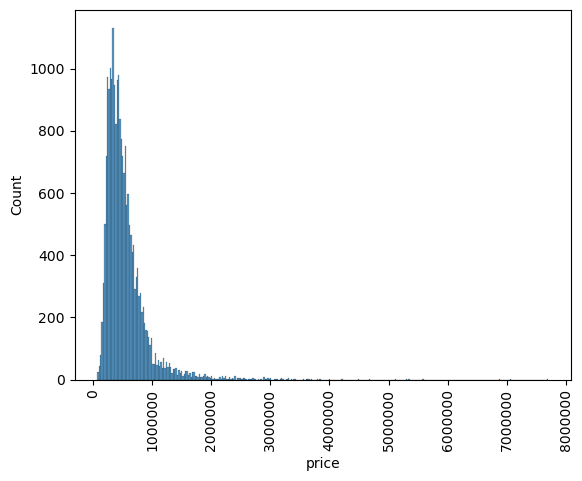

In [6]:
sns.histplot(data=data, x='price')

plt.ticklabel_format(style='plain') # To remove scientific notations from the plot
plt.xticks(rotation=90)
plt.show()

**The Distribution is Right Skewed.**

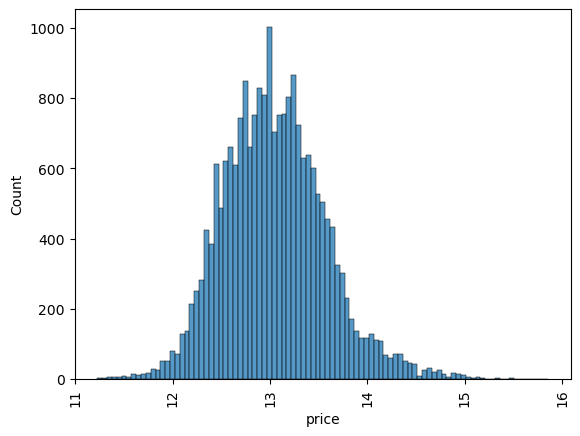

In [7]:
sns.histplot(data=data, x=np.log(data['price']))

plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.show()

**After applying the log transformation, we got "Gaussian" like distribution.**

# Variable Types

In [8]:
# Zipcode is treated as categorical variable
data['zipcode'] = data['zipcode'].astype('O')
data.zipcode.dtype

dtype('O')

In [9]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print("Number of categorical features: {}".format(len(categorical_features)))

Number of categorical features: 2


In [10]:
numerical_features = [feature for feature in data.columns if feature not in categorical_features and feature != 'price']

print('Number of numerical features: {}'.format(len(numerical_features)))

Number of numerical features: 17


# Missing Values

In [11]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

print('Number of features with missing values: {}'.format(len(features_with_na)))

Number of features with missing values: 0


# Convert data['date'] to pd.to_datetime(df['date'])

In [12]:
data['date'] = pd.to_datetime(data['date'])

data['date'].dtypes

dtype('<M8[ns]')

In [13]:
data['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

# Numerical Features

In [14]:
print('Total number of numerical features: {}'.format(len(numerical_features)))

Total number of numerical features: 17


In [15]:
data[numerical_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Temporal Features

In [16]:
temporal_features = [feature for feature in numerical_features if 'yr' in feature]

print('Total number of temporal features: {}'.format(len(temporal_features)))

Total number of temporal features: 2


In [17]:
temporal_features

['yr_built', 'yr_renovated']

In [18]:
for feature in temporal_features:
    print(feature, data[feature].unique())
    print()

yr_built [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]

yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]



### Price vs Year built

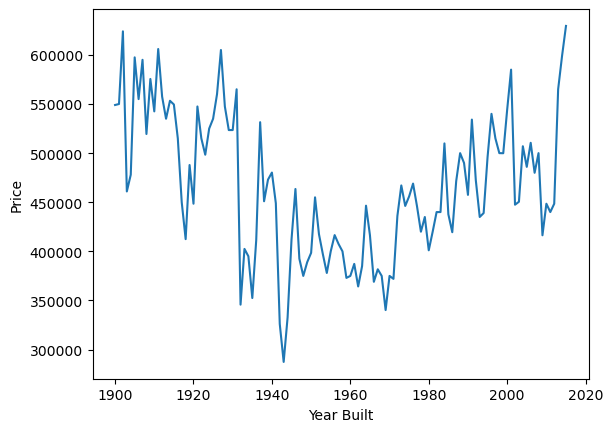

In [19]:
data.groupby('yr_built')['price'].median().plot()
plt.ylabel('Price')
plt.xlabel('Year Built')
    
plt.show()

### Price vs Year Renovated

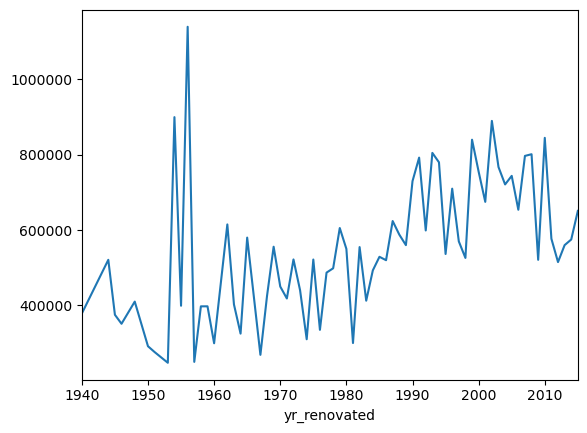

In [20]:
data.groupby('yr_renovated')['price'].median().plot()

# data.groupby('yr_renovated')['yr_renovated'].median().index[2] # By not considering 0. '0' means house is not renovated.

# Setting x-axis range
plt.xlim(data.groupby('yr_renovated')['yr_renovated'].median().index[2], data.groupby('yr_renovated')['yr_renovated'].median().max())
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### Number_of_houses got renovated per year

In [21]:
renovated_peryear = pd.DataFrame({'year': data['yr_renovated'].value_counts().to_dict().keys(), 'number_of_houses': data['yr_renovated'].value_counts().to_dict().values()})

renovated_peryear.head()

,year,number_of_houses
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35


* **0 means house are not renovated. It looks like most of them are not.**
* **I am removing 0, so that we can plot how many houses are renovated per year.**

In [22]:
renovated_peryear.drop(0, axis=0, inplace=True)

print(renovated_peryear.shape)
renovated_peryear.head()

(69, 2)


,year,number_of_houses
1,2014,91
2,2013,37
3,2003,36
4,2005,35
5,2007,35


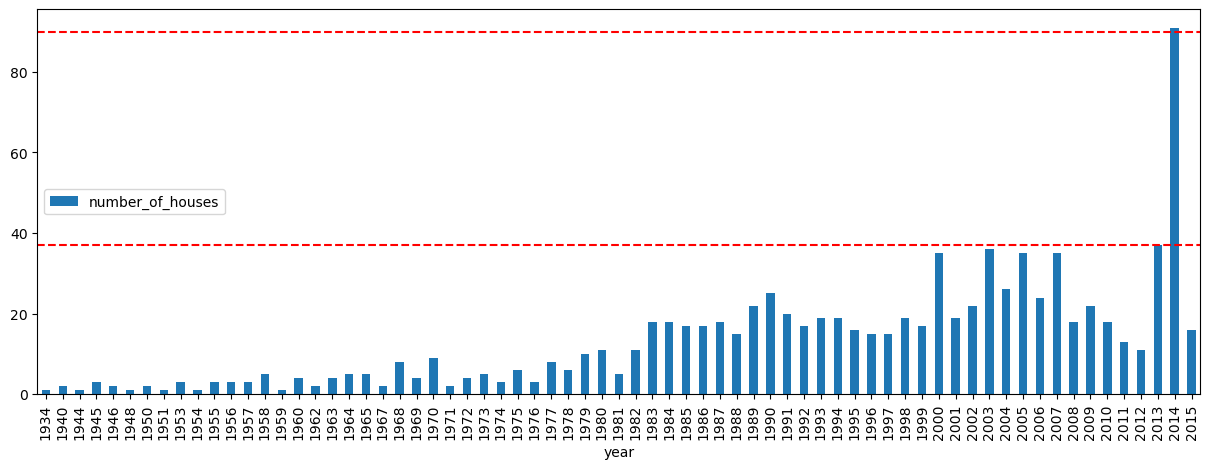

In [23]:
renovated_peryear.sort_values('year').plot(x='year', y='number_of_houses', kind='bar', figsize=(15, 5))
plt.axhline(y=90, linestyle='--', color='red')
plt.axhline(y=37, linestyle='--', color='red')

plt.show()

### yr_renovated - yr_built vs price

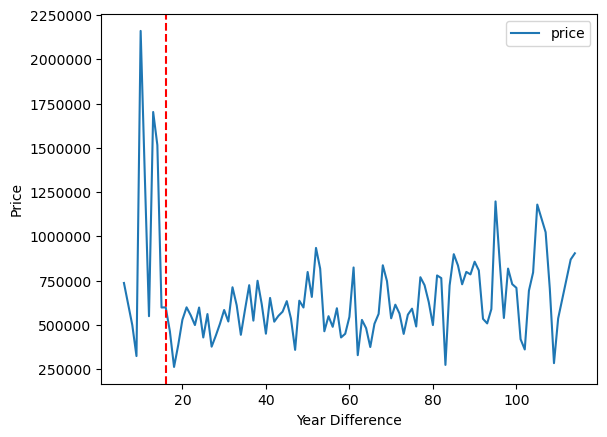

In [24]:
def year_difference_vs_price(dataset):
    df = dataset.copy()
    df['year_difference'] = df['yr_renovated'] - df['yr_built']
    
    # Filtering houses which are not renovated.
    to_plot = df[df['year_difference'] > 0][['year_difference', 'price']] 
    to_plot.groupby('year_difference').median().plot()
    
    plt.ticklabel_format(style='plain')
    plt.ylabel('Price')
    plt.xlabel('Year Difference')
    plt.axvline(16, color='red', linestyle='--')
    plt.show()
    
    
year_difference_vs_price(data)

### Dates vs Price

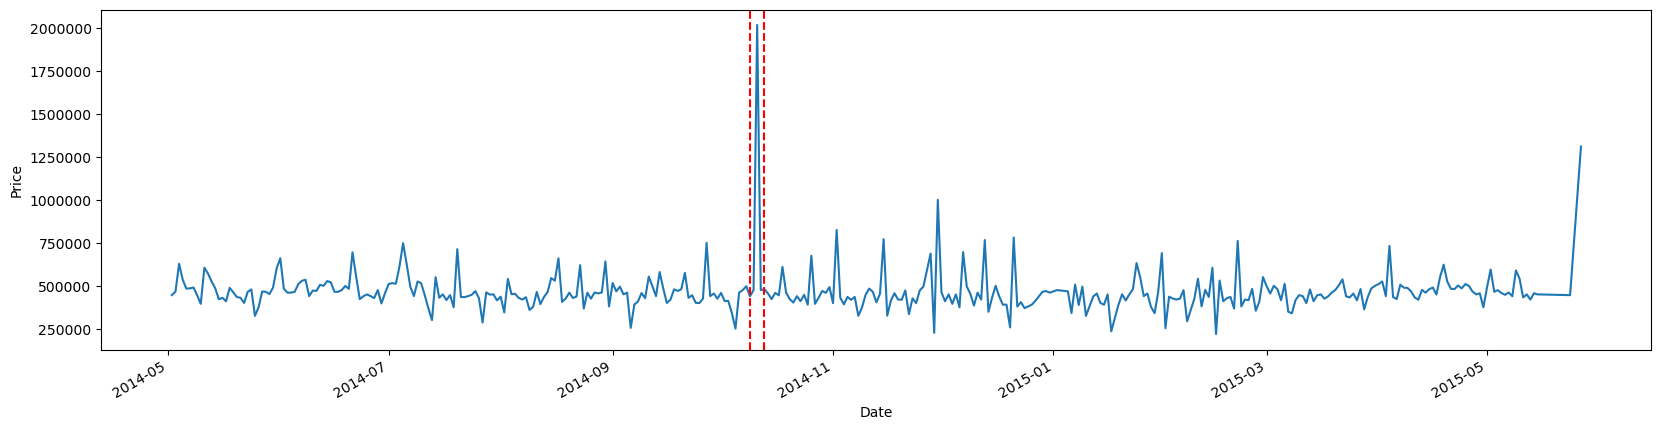

In [25]:
data.groupby('date')['price'].median().plot(kind='line', figsize=(20, 5))

plt.ticklabel_format(style='plain', axis='y')
plt.axvline(x='2014-10-9', linestyle='--', color='red')
plt.axvline(x='2014-10-13', linestyle='--', color='red')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

# Discrete Features

In [26]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
discrete_features = [feature for feature in numerical_features if data[feature].nunique() <= 30 and feature not in temporal_features]

print('The total number of discrete features: {}'.format(len(discrete_features)))
print(discrete_features)

The total number of discrete features: 7
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']


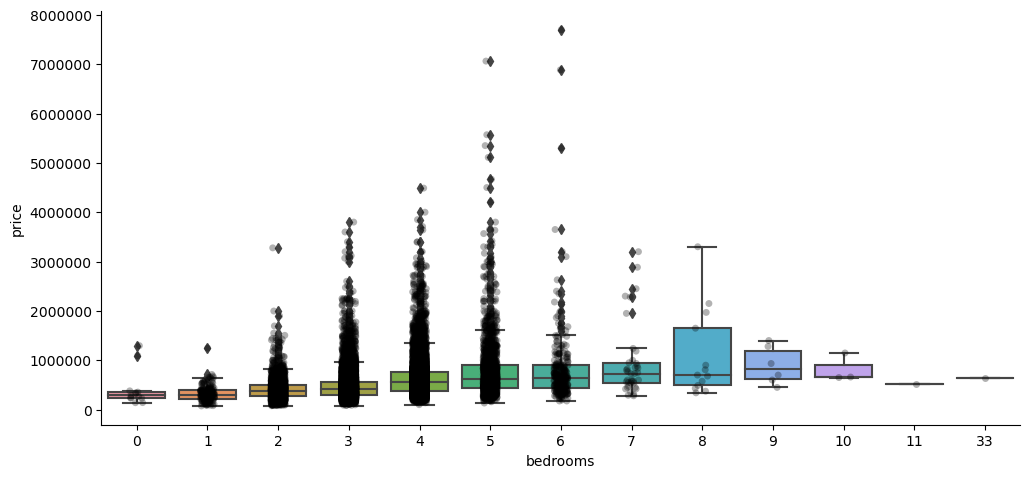

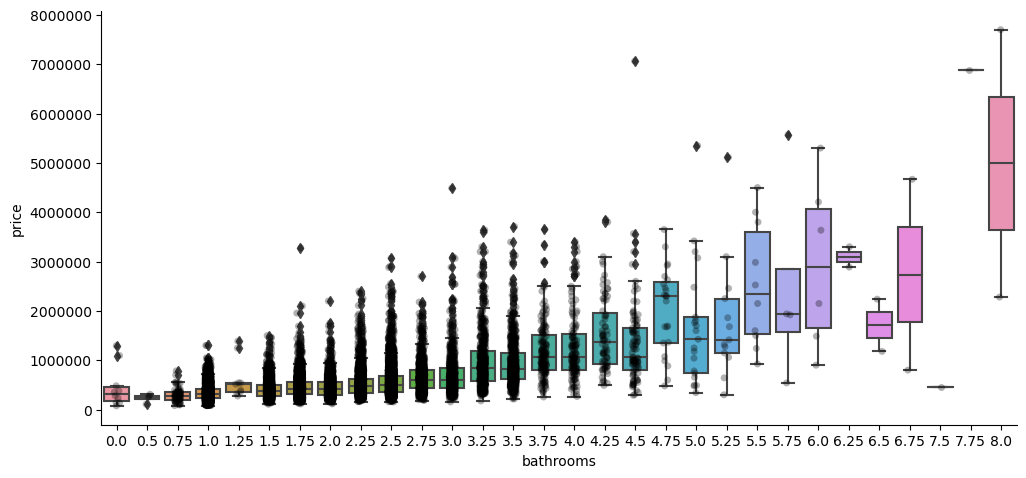

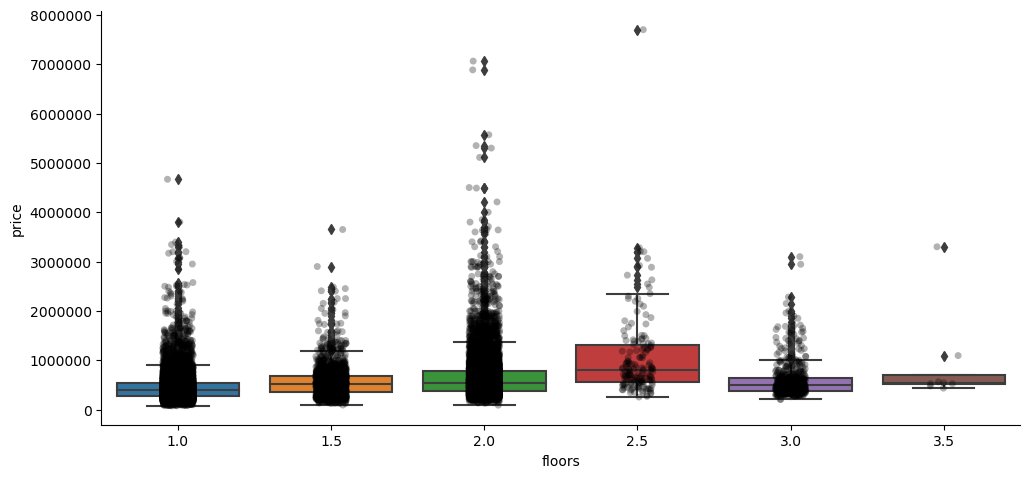

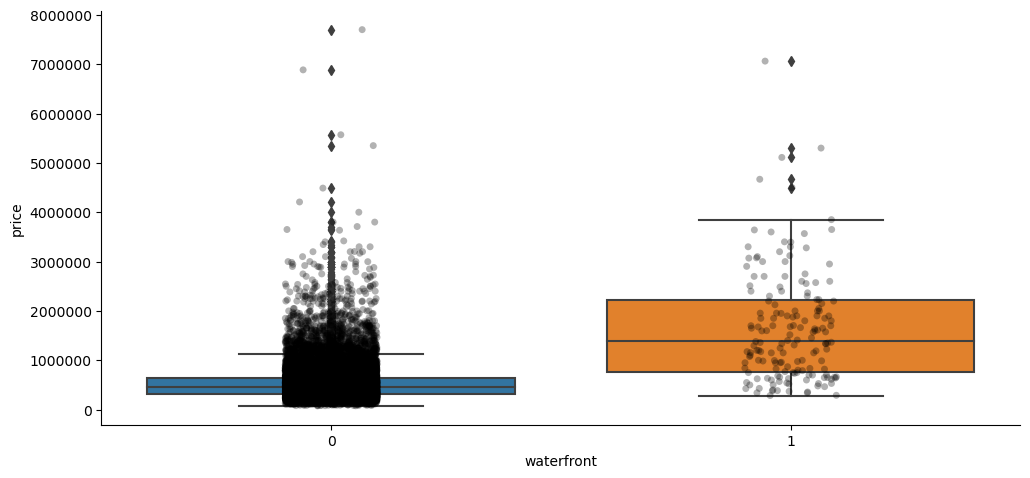

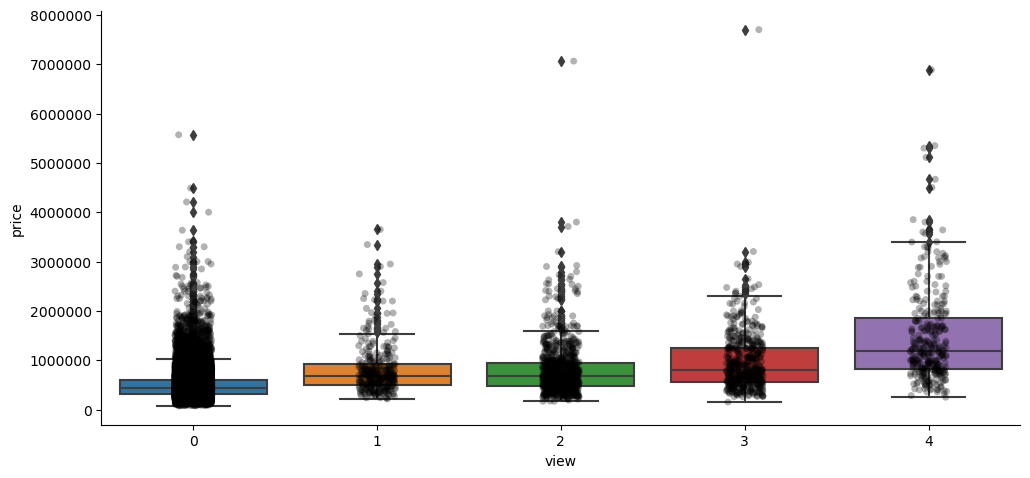

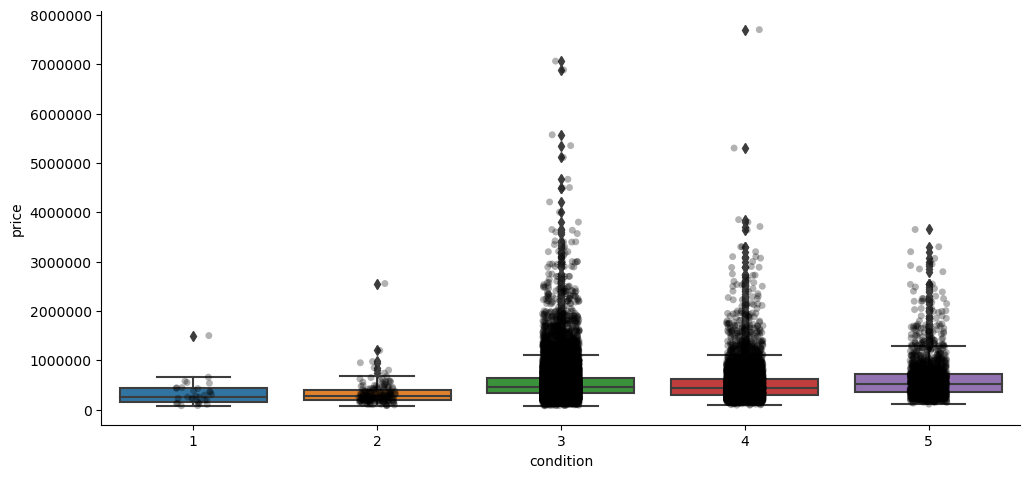

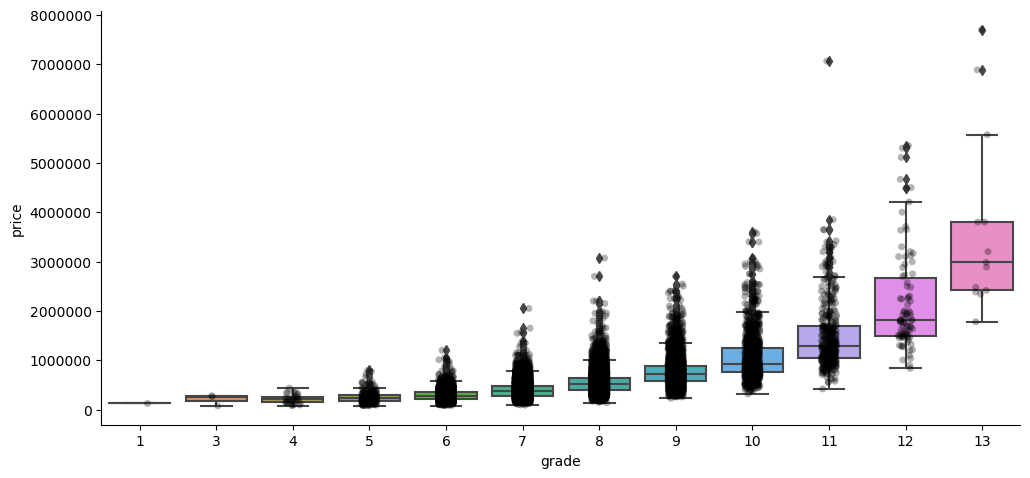

In [28]:
for feature in discrete_features:
    g = sns.catplot(data=data, x=feature, y = 'price', kind='box', height=4, aspect=1.5)
    sns.stripplot(data=data, x=feature, y ='price', jitter=0.1, alpha=0.3, color='k')
    g.fig.set_size_inches(10,5)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.show()

## Date as discrete feature (per year)

In [29]:
data['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [30]:
def parse_year_and_plot(dataset):
    df = dataset.copy()
    
    df['year'] = pd.DatetimeIndex(df['date']).year
        
    figure, ax = plt.subplots(1, 2)
    
    df[df['year'] == 2014][['year', 'price']].groupby('year').sum().plot(ax=ax[0], kind='bar')
        
    df[df['year'] == 2015][['year', 'price']].groupby('year').sum().plot(ax=ax[1], kind='bar')
    
    
    plt.show()
    
    

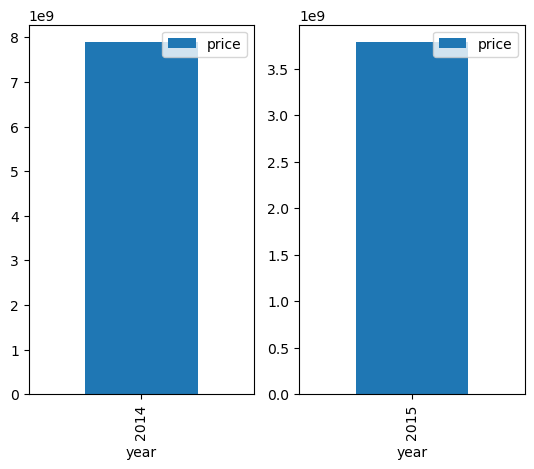

In [31]:
parse_year_and_plot(data)

# Continuous Features

In [32]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + temporal_features]

print('Total number of contiuous features: {}'.format(len(continuous_features)))
print(continuous_features)

Total number of contiuous features: 8
['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [36]:
data[continuous_features].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,1180,5650,1180,0,47.5112,-122.257,1340,5650
1,2570,7242,2170,400,47.7210,-122.319,1690,7639
2,770,10000,770,0,47.7379,-122.233,2720,8062
3,1960,5000,1050,910,47.5208,-122.393,1360,5000
4,1680,8080,1680,0,47.6168,-122.045,1800,7503


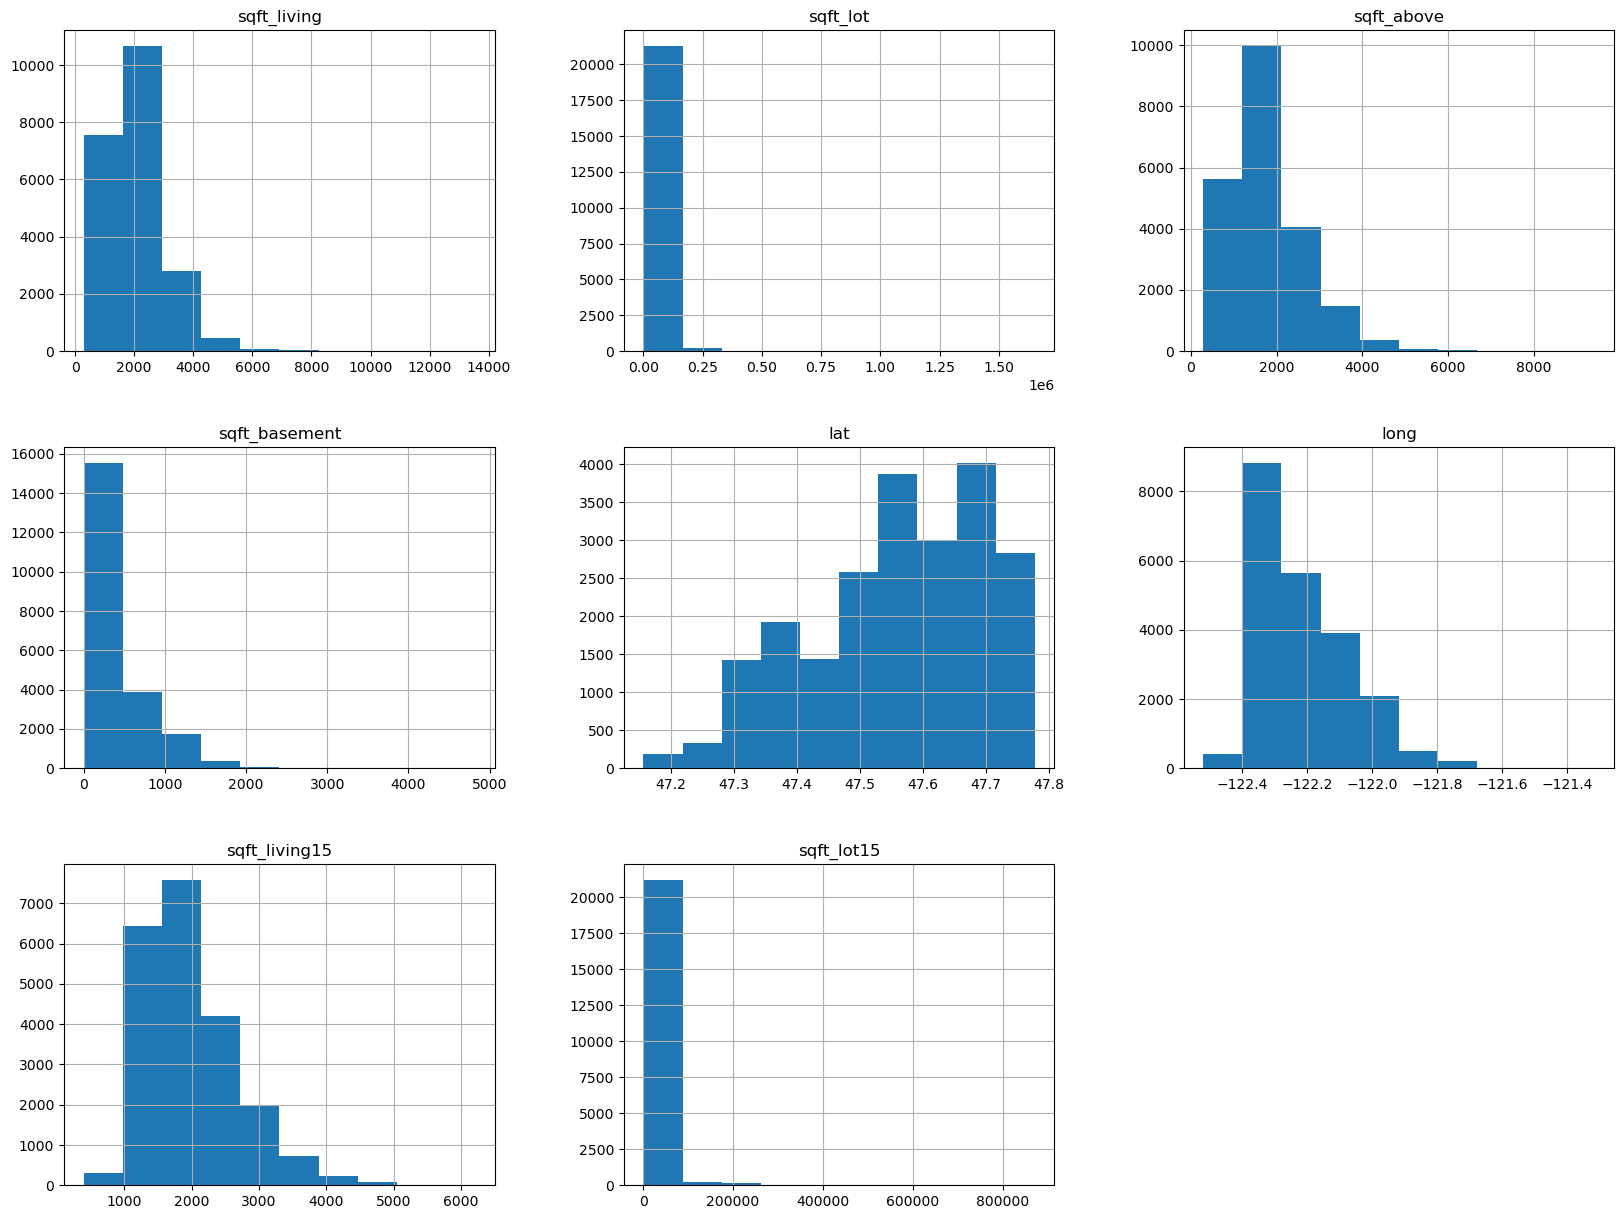

In [37]:
data[continuous_features].hist(figsize=(20, 15))

plt.show()

In [38]:
extremely_skewed = ['sqft_lot', 'sqft_lot15']

print('Total number of features which are extremely skewed: {}'.format(len(extremely_skewed)))
print(extremely_skewed)

Total number of features which are extremely skewed: 2
['sqft_lot', 'sqft_lot15']


In [39]:
continuous_features = [feature for feature in continuous_features if feature not in extremely_skewed]

print('Total number of features which are not extremely skewed: {}'.format(len(continuous_features)))
continuous_features

Total number of features which are not extremely skewed: 6


['sqft_living', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15']

## Yeo - Johnson Transformation

In [40]:
temp_data = data.copy(deep=True)

for feature in continuous_features:
#     temp_data[feature] = (temp_data[feature] - temp_data[feature].mean()) / temp_data[feature].std()
    temp_data[feature], param = stats.yeojohnson(data[feature])

C:\Users\neere\anaconda3\lib\site-packages\scipy\stats\morestats.py:1375: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\neere\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\neere\anaconda3\lib\site-packages\scipy\stats\morestats.py:1379: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lm

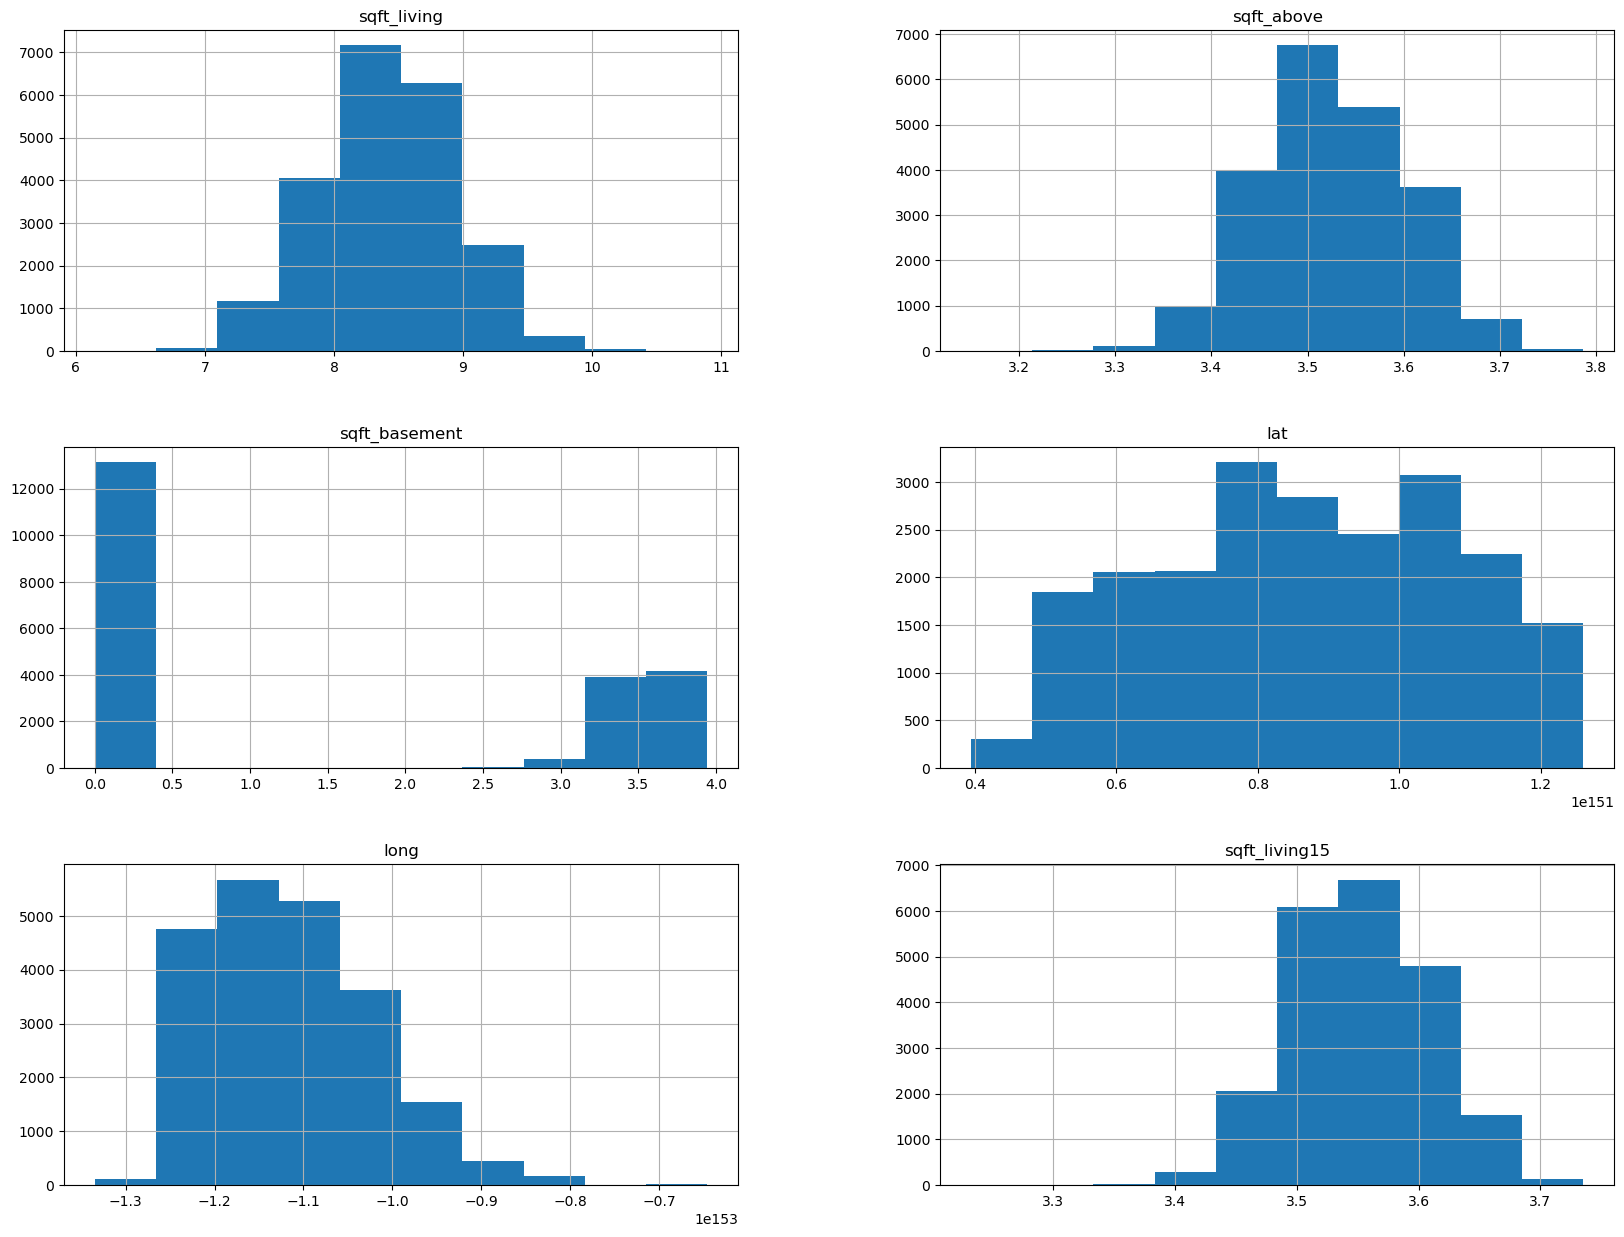

In [41]:
temp_data[continuous_features].hist(figsize=(20, 15))

plt.show()

### Before and After Transformation of continuous features

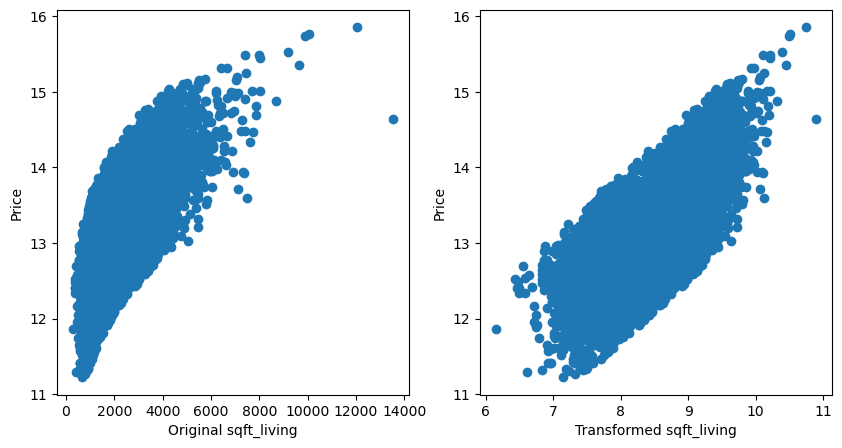

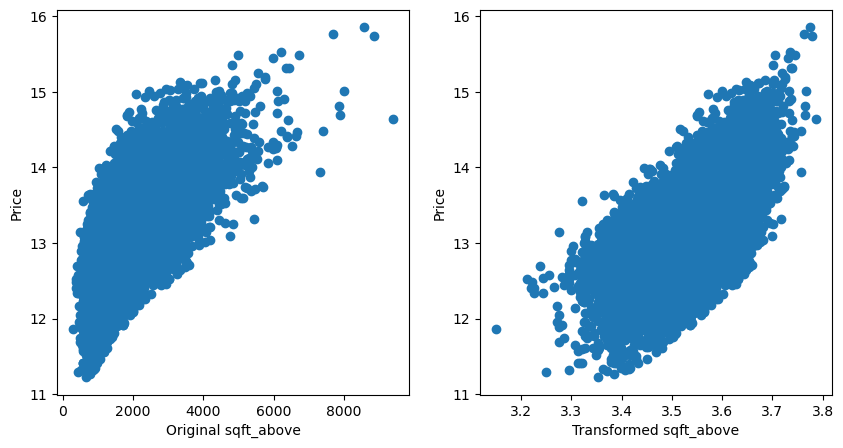

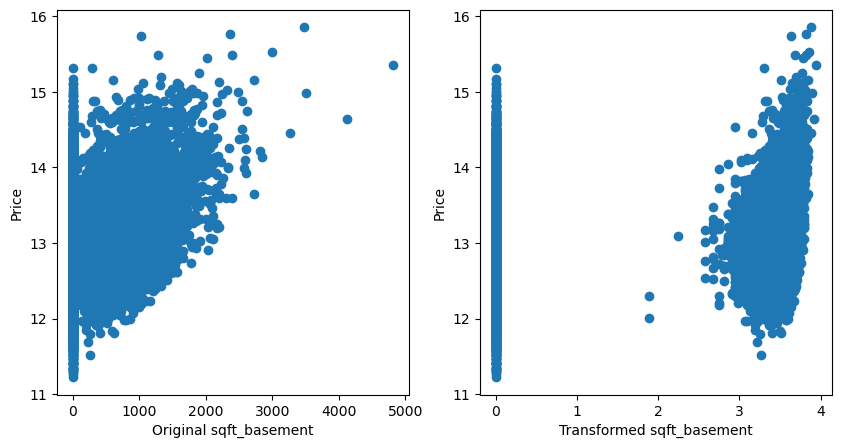

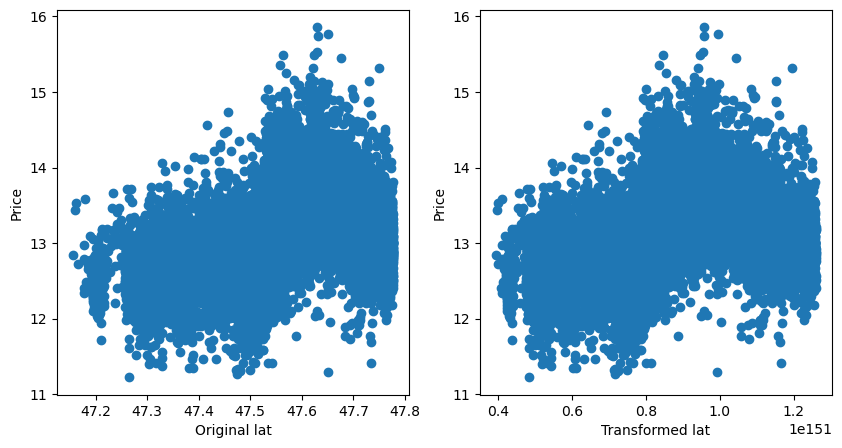

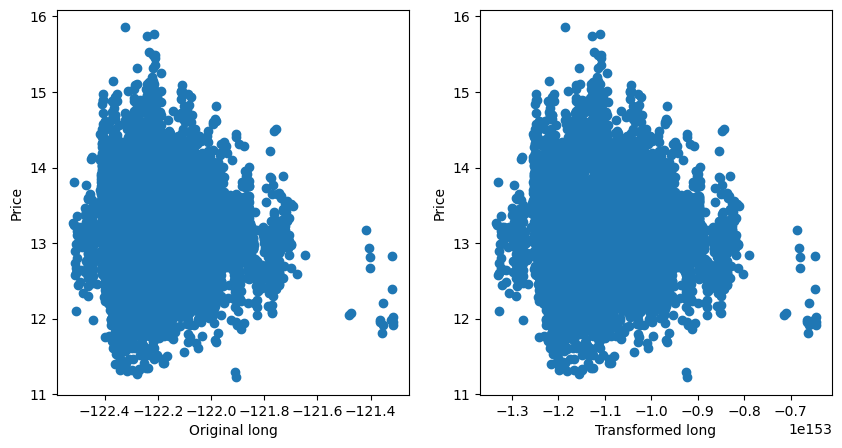

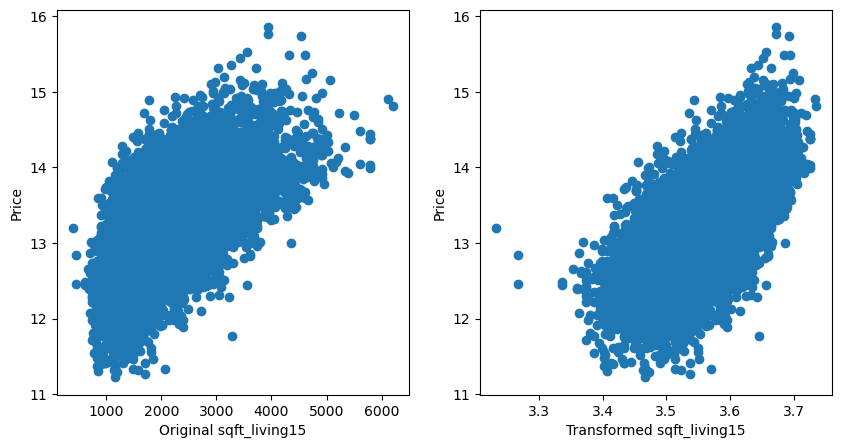

In [39]:
for feature in continuous_features:
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x=data[feature], y=np.log(data['price']))
    plt.ylabel('Price')
    plt.xlabel("Original " + feature)
    
    plt.subplot(1, 2, 2)
    plt.scatter(x=temp_data[feature], y=np.log(data['price']))
    plt.ylabel('Price')
    plt.xlabel("Transformed " + feature)    
    
    plt.show()

## Standard Normal Transformation

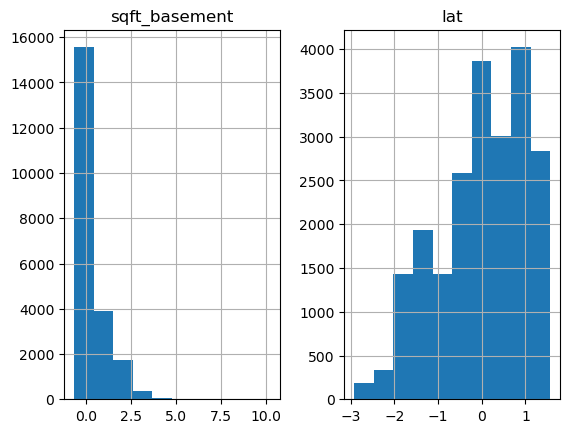

In [40]:
temp_data = data.copy()

for feature in ['sqft_basement', 'lat']:
    temp_data[feature] = (temp_data[feature] - temp_data[feature].mean()) / temp_data[feature].std()
    
temp_data[['sqft_basement', 'lat']].hist()

plt.show()

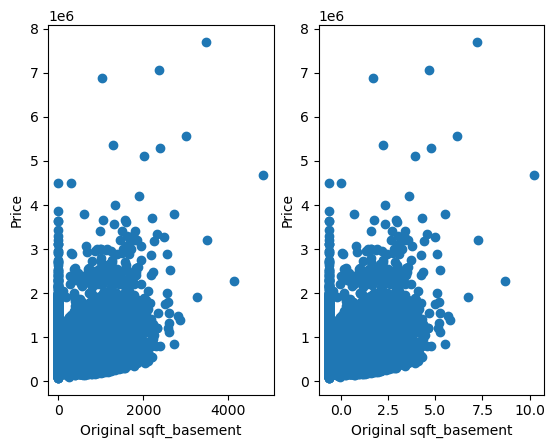

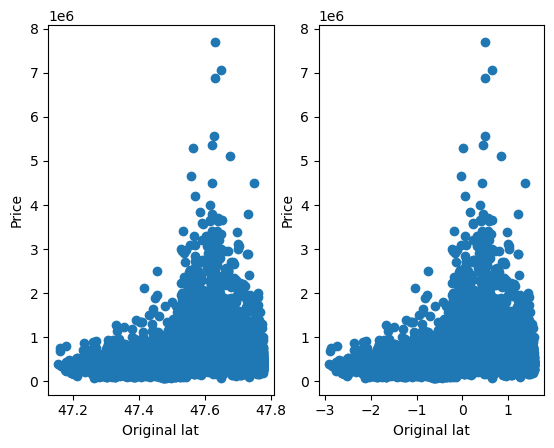

In [41]:
for feature in ['sqft_basement', 'lat']:
    
    plt.subplot(1, 2, 1)
    plt.scatter(x=data[feature], y=data['price'])
    plt.ylabel('Price')
    plt.xlabel("Original " + feature)
    
    plt.subplot(1, 2, 2)
    plt.scatter(x=temp_data[feature], y=temp_data['price'])
    plt.ylabel('Price')
    plt.xlabel("Original " + feature)    
    
    plt.show()

## Binary Transformation (For Skewed Features)

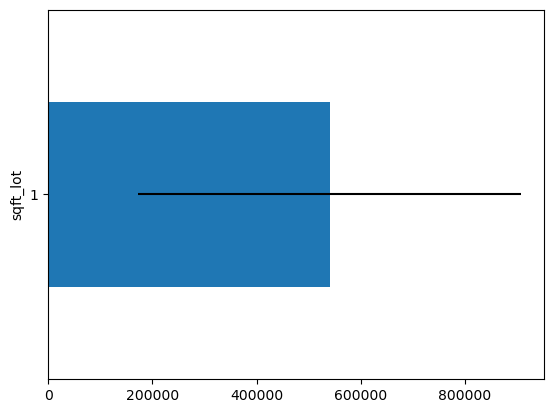

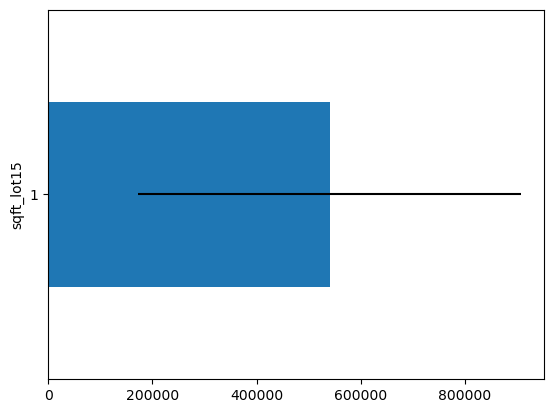

In [42]:
for feature in extremely_skewed:
    temp_data = data.copy()
    
    temp_data[feature] = np.where(temp_data[feature] == 1, 0, 1)
    temp_data = temp_data.groupby(feature)['price'].agg(['mean', 'std'])
    temp_data.plot(kind='barh', y='mean', xerr='std', legend=False)
    
    plt.show()
    

# Categorical Variables

In [43]:
print('Number of categoical features: {}'.format(len(categorical_features)))

Number of categoical features: 2


In [44]:
data[categorical_features].head()

,date,zipcode
0,2014-10-13,98178
1,2014-12-09,98125
2,2015-02-25,98028
3,2014-12-09,98136
4,2015-02-18,98074


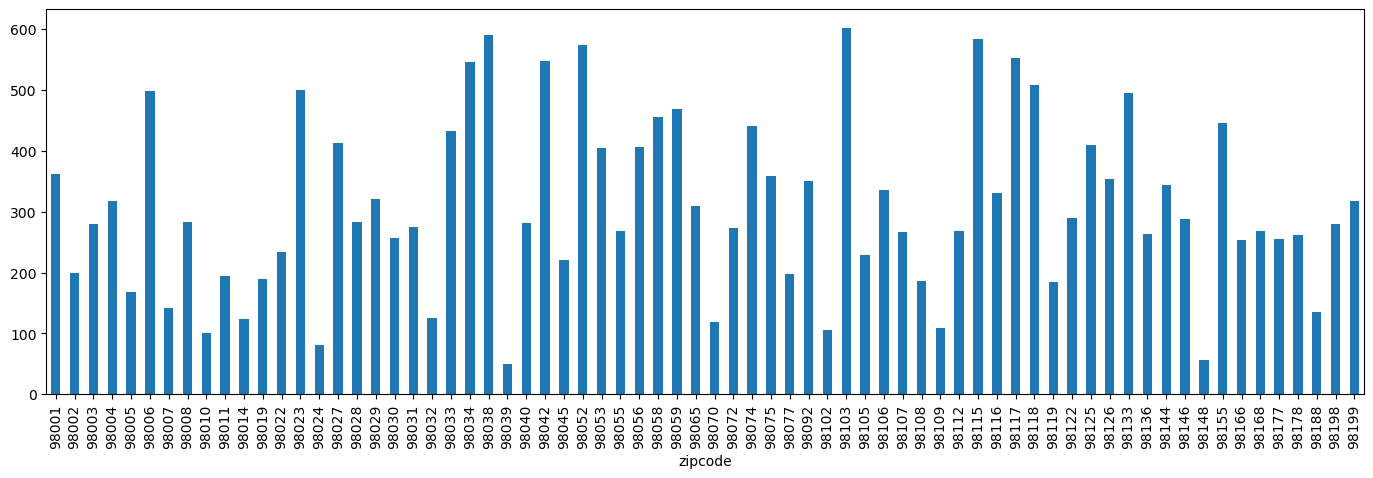

In [52]:
data.groupby('zipcode')['zipcode'].agg('count').plot.bar(figsize=(17, 5))

plt.show()

## Quality Features

In [53]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
quality_features = ['condition', 'grade']

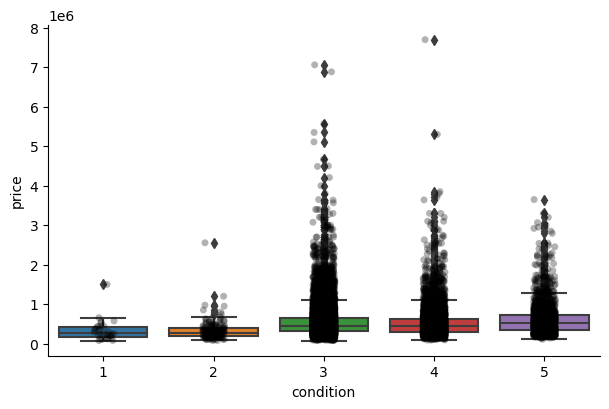

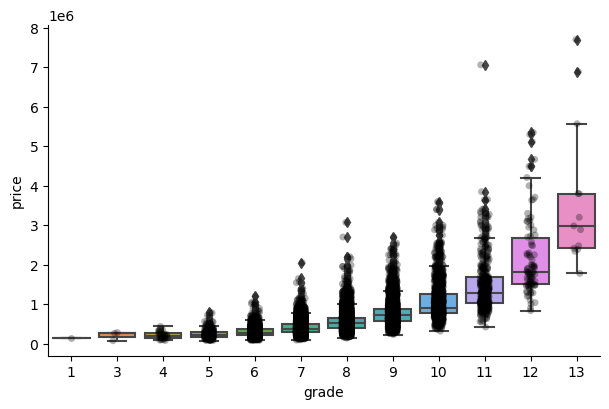

In [56]:
for feature in quality_features:
    sns.catplot(x=feature, y='price', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=feature, y='price', data=data, jitter=0.1, alpha=0.3, color='k')
    
    plt.show()

# Extracting Information from date

In [57]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime

#Instantiate
dt_fe = FeatureEngineering_DateTime()

#Fit
dt_fe.fit(data, datetime_variables=['date'], prefix = 'date: ')

#Transform
df = dt_fe.transform(data)
df.head()

C:\Users\neere\anaconda3\lib\site-packages\fast_ml\feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date: year,date: quarter,date: month,date: day,date: day_of_week,date: day_of_year,date: weekofyear,date: is_month_end,date: is_month_start,date: is_quarter_end,date: is_quarter_start,date: is_year_end,date: is_year_start,date: time,date: hour,date: minute,date: second,date: is_weekend,date: day_part
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,4,10,13,0,286,42,False,False,False,False,False,False,00:00:00,0,0,0,0,None
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,4,12,9,1,343,50,False,False,False,False,False,False,00:00:00,0,0,0,0,None
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1,2,25,2,56,9,False,False,False,False,False,False,00:00:00,0,0,0,0,None
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,4,12,9,1,343,50,False,False,False,False,False,False,00:00:00,0,0,0,0,None
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1,2,18,2,49,8,False,False,False,False,False,False,00:00:00,0,0,0,0,None


In [58]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date: year', 'date: quarter',
       'date: month', 'date: day', 'date: day_of_week', 'date: day_of_year',
       'date: weekofyear', 'date: is_month_end', 'date: is_month_start',
       'date: is_quarter_end', 'date: is_quarter_start', 'date: is_year_end',
       'date: is_year_start', 'date: time', 'date: hour', 'date: minute',
       'date: second', 'date: is_weekend', 'date: day_part'],
      dtype='object')

## Extracing price information using date: features